In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings("ignore")

### *A) Importar Dados de Chuvas, Pressao, Precipitação e Temperatura*

In [2]:
open_file = '../../Data/process/patio1_PosicaoVento.csv'
df_patio = pd.read_csv(open_file, delimiter=',', index_col=0, parse_dates=['Data'])
df_patio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Longitude            8760 non-null   float64       
 1   Latitude             8760 non-null   float64       
 2   Magnitude_Observada  8760 non-null   float64       
 3   Direcao              8760 non-null   float64       
 4   Data                 8760 non-null   datetime64[ns]
 5   Valor_Pressao        8760 non-null   float64       
 6   Valor_Temp           8760 non-null   float64       
 7   Valor_Chuva          8760 non-null   float64       
 8   Magnitude_Verif      8760 non-null   float64       
 9   PosicaoVento         8760 non-null   object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 752.8+ KB


### <span style="color:#4169E1">**B. Grafico de Dispersão em 30 DIAS de dados**

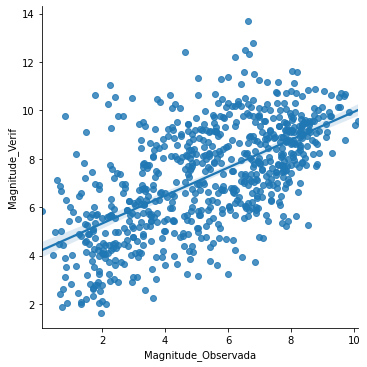

In [3]:
# LINEAR 
df_patio_grafico = df_patio.loc[1:732]
sns.lmplot(data=df_patio_grafico, y = "Magnitude_Verif", x = "Magnitude_Observada")

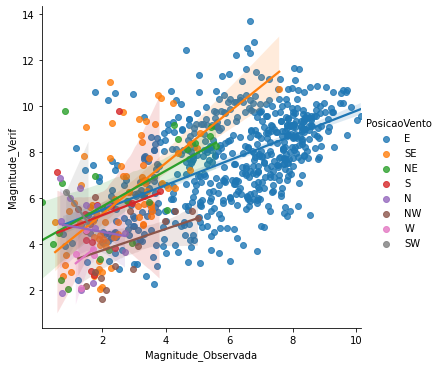

In [4]:
# LINEAR 
df_patio_grafico = df_patio.loc[1:732] # 30 dias
sns.lmplot(data=df_patio_grafico, y = "Magnitude_Verif", x = "Magnitude_Observada", hue='PosicaoVento')

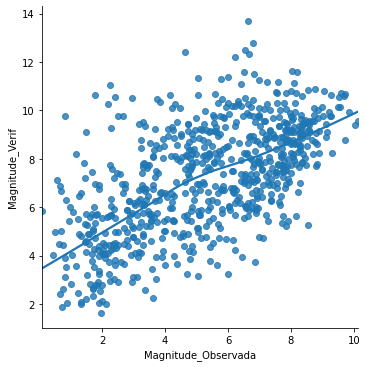

In [5]:
# NAO LINEAR
df_patio_grafico = df_patio.loc[1:732]
sns.lmplot(data=df_patio_grafico, y = "Magnitude_Verif", x = "Magnitude_Observada",lowess = True)

### <span style="color:#4169E1">**C. Grafico de BarPlot**

O bar plot é usado para variáveis qualitativas e quantitativas discretas. Ele indica a contagem com que cada valor ocorre para esta variável. 
<br>Ao invés de apresentarem um ponto para cada observação, estes gráficos indicam a frequência com que cada valor ocorre para uma variável.

<AxesSubplot:xlabel='Data', ylabel='Magnitude_Observada'>

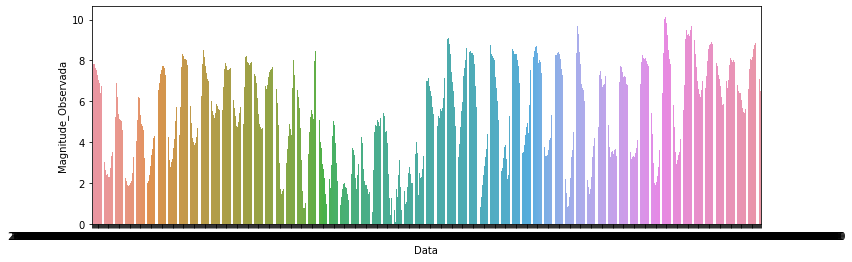

In [6]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data=df_patio_grafico,x = "Data", y = "Magnitude_Observada", ax=ax)

<AxesSubplot:xlabel='Data', ylabel='Magnitude_Verif'>

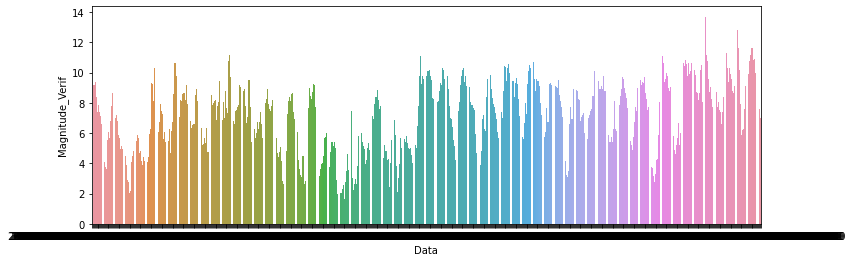

In [7]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data=df_patio_grafico,x = "Data", y = "Magnitude_Verif", ax=ax)

### <span style="color:Blue"> ***D) Regressão Linear*** 

### <span style="color:#4169E1">**D1. Cálculos**

- slope = Inclinação da linha de regressão.<br>
- intercept= Interceptação da linha de regressão.<br>
- rvalue = Coeficiente de correlação.<br>
- pvalue= Valor p bilateral para um teste de hipótese cuja hipótese nula é que a inclinação é zero, usando o Teste de Wald com distribuição t da estatística de teste<br>
- stderr = (Desvio)Erro padrão da inclinação estimada (gradiente), considerando a normalidade residual.<br>


In [8]:
x = df_patio['Magnitude_Observada'] 
y = df_patio['Magnitude_Verif']
a, b, r, p, std_err = stats.linregress(x,y)

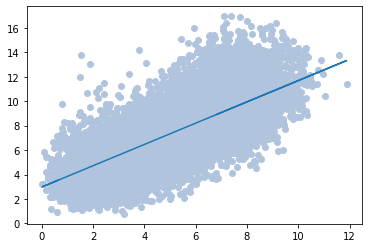

In [9]:
def estimate_y(x):
    return a * x + b

df_patio['y_Magnitude_Verif'] = df_patio['Magnitude_Observada'].apply(estimate_y)  
# A partir da coluna Vento observado, será criado uma nova coluna chamada y_estimado

plt.figure()
plt.plot(df_patio['Magnitude_Observada'], df_patio['y_Magnitude_Verif'])
plt.scatter(df_patio['Magnitude_Observada'], df_patio['Magnitude_Verif'], color='#B0C4DE')
plt.show()

### <span style="color:#4169E1">**D2. Coeficiente de Determinação**

In [10]:
coef_determinacao = r**2

print("A correlação é de: " + str(coef_determinacao) + " %") # Proximo de 1 é uma boa estimativa

A correlação é de: 0.4633678279690343 %


### <span style="color:#8B008B"> ***E) Regressão Linear Multipla*** 

<b>Formula:</b><br>
<i>
VentoVerificado = b0 + (b1 x VentoObservado) + (b2 x PressaoAtmosferica) + (b3 x Temperatura) + (b4 x Chuva) + (b5 x DirecaoGraus) + (b6 x DirecaoCardeal)
</i>
<p>
<b>Avaliação do P-valor:</b>
<br>p-valor = Probabilidade dos valores se referirem à hipotese nula
<br>p-valor baixo -> Melhor associação entre o preditor e o valor

<p><b>Tabela:</b>
<br>p-valor < 0.001 -> Alto nivel de certeza
<br>p-valor < 0.05  -> Nível de certeza moderado
<br>p-valor < 0.01  -> Nível de certeza fraco
<br>p-valor > 0.1  -> Não há nivel de certezaaceitávelno resultado

<i>Ou seja,</i> Coluna P>|t|. Quanto mais próximo o valor for de zero(0), mais correlacionado a variavel é.
<p>
<b>Como Avaliar o Summary:</b><br>
    1. <b><i>Teste F de Significancia  Global</b></i> (O modelo é útil para prever ?)<br>
Resposta: Verifique se o valor da coluna 'Prob(F-statistic) = valor p do teste F' é < 0,05. 
<br>Se houver, significa pelo menos 1 variavel no modelo está correlacionada a variavel dependente
<p>
    2. <b><i>Teste de significancia individua</b></i><br>
Resposta: Na tabela, verifique o valor P>|y| das variaveis independente são menores que 0.05.
<br>Se houver, há evidencias estatisticas de relação.
<p>
    3.<b><i> R2 e R2-Ajustado.</b></i><br>
Resposta: As variaveis independente explicam qual % de variabilidade da variavel dependente.<br>
    Verifique o valor da variavel "R-squared" para responder. Já o R2-Ajustado,que é sempre um pouco menor que o R2
    deve ser usado quando queremos comparar modelos com diferentes quantidades de variaveis.
<p>
<b><i>Quais são os coeficientes da equação</b></i><br>
Resposta: y = coef.intercept + coef.direcao x {valorDirecao} + coef.Magnitude_Observada x {Magnitude_Observada} + ...

#### <span style="color:#8B008B"> **R2 = 0.483 ~ Usando (Vento Previsto + Direção + Posição do Vento)**

In [4]:
# Método: Ordinary Least Square
# Estimador escolhido: R2
#
model = ols('Magnitude_Verif ~  Magnitude_Observada + Direcao + PosicaoVento ', data = df_patio) #
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Magnitude_Verif   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     909.9
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:21:39   Log-Likelihood:                -18513.
No. Observations:                8760   AIC:                         3.705e+04
Df Residuals:                    8750   BIC:                         3.712e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.5401      0.123     20.694      0.000       2.299       2.781
PosicaoVento[T.N]      -0.6730      0.225     -2.991      0.003      -1.114      -0.232
PosicaoVento[T.NE]      0.4392      0.161      2.730      0.006       0.124       0.755
PosicaoVento[T.NW]     -0.6560      0.280     -2.347      0.019      -1.204      -0.108
PosicaoVento[T.S]       0.0615      0.215      0.286      0.775      -0.360       0.483
PosicaoVento[T.SE]      1.1919      0.080     14.925      0.000       1.035       1.348
PosicaoVento[T.SW]     -0.6314      0.312     -2.023      0.043      -1.243      -0.020
PosicaoVento[T.W]      -1.3524      0.287     -4.720      0.000      -1.914      -0.791
Magnitude_Observada     0.8843      0.011     78.378      0.000       0.862       0.906
Direcao                 0.0026      0.001      2.405      0.016       0.000       0.005
==============================================================================
Omnibus:                      132.172   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.016
Skew:                           0.307   Prob(JB):                     1.07e-30
Kurtosis:                       2.978   Cond. No.                     2.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### <span style="color:#8B008B"> **R2 = 0.486 ~  Usando (Vento Previsto + Direção + PosicaoVento + Pressão Atmosferica)**

In [5]:
model = ols('Magnitude_Verif ~ Magnitude_Observada + Direcao + PosicaoVento + Valor_Pressao', data = df_patio) #
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Magnitude_Verif   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     828.1
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:22:21   Log-Likelihood:                -18489.
No. Observations:                8760   AIC:                         3.700e+04
Df Residuals:                    8749   BIC:                         3.708e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -47.3272      7.168     -6.603      0.000     -61.378     -33.277
PosicaoVento[T.N]      -0.6591      0.224     -2.937      0.003      -1.099      -0.219
PosicaoVento[T.NE]      0.3931      0.161      2.448      0.014       0.078       0.708
PosicaoVento[T.NW]     -0.4237      0.281     -1.509      0.131      -0.974       0.127
PosicaoVento[T.S]       0.0717      0.215      0.334      0.738      -0.349       0.492
PosicaoVento[T.SE]      1.1222      0.080     13.979      0.000       0.965       1.280
PosicaoVento[T.SW]     -0.5761      0.311     -1.850      0.064      -1.186       0.034
PosicaoVento[T.W]      -1.2899      0.286     -4.511      0.000      -1.850      -0.729
Magnitude_Observada     0.8341      0.013     62.398      0.000       0.808       0.860
Direcao                 0.0020      0.001      1.902      0.057    -6.2e-05       0.004
Valor_Pressao           0.0495      0.007      6.958      0.000       0.036       0.063
==============================================================================
Omnibus:                      129.165   Durbin-Watson:                   0.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.720
Skew:                           0.303   Prob(JB):                     5.57e-30
Kurtosis:                       2.964   Cond. No.                     3.43e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### <span style="color:#8B008B"> **R2 = 0.493 ~  Usando (Vento Previsto + PosicaoVento + Direção + Temperatura)**

In [6]:
model = ols('Magnitude_Verif ~ Magnitude_Observada + Direcao +  PosicaoVento + Valor_Temp', data = df_patio) #
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Magnitude_Verif   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     851.7
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:23:54   Log-Likelihood:                -18429.
No. Observations:                8760   AIC:                         3.688e+04
Df Residuals:                    8749   BIC:                         3.696e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.1727      0.219      0.790      0.429      -0.256       0.601
PosicaoVento[T.N]      -0.4148      0.224     -1.854      0.064      -0.853       0.024
PosicaoVento[T.NE]      0.6131      0.160      3.834      0.000       0.300       0.927
PosicaoVento[T.NW]     -0.7046      0.277     -2.545      0.011      -1.247      -0.162
PosicaoVento[T.S]       0.0415      0.213      0.195      0.846      -0.376       0.459
PosicaoVento[T.SE]      1.2202      0.079     15.420      0.000       1.065       1.375
PosicaoVento[T.SW]     -0.6397      0.309     -2.069      0.039      -1.246      -0.034
PosicaoVento[T.W]      -1.4351      0.284     -5.055      0.000      -1.992      -0.879
Magnitude_Observada     0.9685      0.013     75.037      0.000       0.943       0.994
Direcao                 0.0030      0.001      2.878      0.004       0.001       0.005
Valor_Temp              0.0732      0.006     13.033      0.000       0.062       0.084
==============================================================================
Omnibus:                      188.052   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.954
Skew:                           0.363   Prob(JB):                     3.81e-44
Kurtosis:                       3.144   Cond. No.                     2.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### <span style="color:#8B008B"> **R2 = 0.503 ~  Usando (Vento Previsto + Direção + PosicaoVento + Pressão Atmosferica + Temperatura)**

In [7]:
# Método: Ordinary Least Square
# Estimador escolhido: R2
#
model = ols('Magnitude_Verif ~ Magnitude_Observada + Direcao + PosicaoVento + Valor_Temp + Valor_Pressao', data = df_patio) #
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Magnitude_Verif   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     806.1
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:24:43   Log-Likelihood:                -18341.
No. Observations:                8760   AIC:                         3.671e+04
Df Residuals:                    8748   BIC:                         3.679e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -103.2375      7.749    -13.323      0.000    -118.427     -88.048
PosicaoVento[T.N]      -0.2738      0.222     -1.234      0.217      -0.709       0.161
PosicaoVento[T.NE]      0.5942      0.158      3.753      0.000       0.284       0.904
PosicaoVento[T.NW]     -0.2490      0.276     -0.901      0.367      -0.791       0.292
PosicaoVento[T.S]       0.0538      0.211      0.255      0.799      -0.360       0.467
PosicaoVento[T.SE]      1.0893      0.079     13.797      0.000       0.935       1.244
PosicaoVento[T.SW]     -0.5297      0.306     -1.730      0.084      -1.130       0.070
PosicaoVento[T.W]      -1.3427      0.281     -4.776      0.000      -1.894      -0.792
Magnitude_Observada     0.9020      0.014     65.776      0.000       0.875       0.929
Direcao                 0.0021      0.001      2.048      0.041    9.15e-05       0.004
Valor_Temp              0.1051      0.006     17.363      0.000       0.093       0.117
Valor_Pressao           0.1016      0.008     13.351      0.000       0.087       0.116
==============================================================================
Omnibus:                      192.890   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.727
Skew:                           0.365   Prob(JB):                     2.12e-45
Kurtosis:                       3.175   Cond. No.                     3.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### <span style="color:#8B008B"> **R2 = 0.503 ~ Usando (Vento Previsto + Direção + PosicaoVento + Pressão Atmosferica + Temperatura + Chuva)**
Chuva não contribui para a correlação...

In [8]:
# Método: Ordinary Least Square
# Estimador escolhido: R2
#
model = ols('Magnitude_Verif ~ Magnitude_Observada + Direcao + PosicaoVento + Valor_Pressao + Valor_Temp + Valor_Chuva', data = df_patio) #
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Magnitude_Verif   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     739.1
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:25:33   Log-Likelihood:                -18340.
No. Observations:                8760   AIC:                         3.671e+04
Df Residuals:                    8747   BIC:                         3.680e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -104.1049      7.791    -13.363      0.000    -119.377     -88.833
PosicaoVento[T.N]      -0.2888      0.222     -1.300      0.194      -0.724       0.147
PosicaoVento[T.NE]      0.5831      0.159      3.675      0.000       0.272       0.894
PosicaoVento[T.NW]     -0.2808      0.278     -1.011      0.312      -0.825       0.264
PosicaoVento[T.S]       0.0495      0.211      0.235      0.814      -0.364       0.463
PosicaoVento[T.SE]      1.0859      0.079     13.743      0.000       0.931       1.241
PosicaoVento[T.SW]     -0.5364      0.306     -1.752      0.080      -1.137       0.064
PosicaoVento[T.W]      -1.3609      0.282     -4.832      0.000      -1.913      -0.809
Magnitude_Observada     0.9032      0.014     65.658      0.000       0.876       0.930
Direcao                 0.0022      0.001      2.086      0.037       0.000       0.004
Valor_Pressao           0.1024      0.008     13.391      0.000       0.087       0.117
Valor_Temp              0.1061      0.006     17.334      0.000       0.094       0.118
Valor_Chuva             0.0857      0.080      1.070      0.285      -0.071       0.243
==============================================================================
Omnibus:                      192.660   Durbin-Watson:                   0.288
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.483
Skew:                           0.365   Prob(JB):                     2.40e-45
Kurtosis:                       3.177   Cond. No.                     3.79e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""